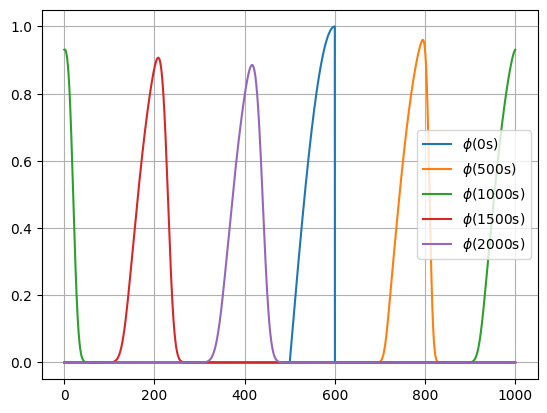

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x < 500. or x > 600.: 
        return 0.
    else:
        return -np.cos(np.pi*(x-400.)/200.)

# scheme
def ftbs(y0):
    return (1-c)*y0 + c*np.roll(y0, +1)
def ftfs(y0):
    return (1+c)*y0 - c*np.roll(y0, -1)

# main loop
def advection(x0, y0):
    t = 0
    scheme = ftbs if u > 0 else ftfs
    while t < duration:
        if t%tinterval < dt:
            plt.plot(x0, y0, label="$\phi$("+str(int(np.floor(t)))+"s)")
        y0 = scheme(y0)
        t = t + dt
    plt.legend()
    plt.grid()
    plt.show()

# intial condition
u = 0.42; dx = 0.25; dt = 0.15
c = u*dt/dx
tinterval = 500; duration = 2000+10
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)

# run
advection(x0, y0)

/tmp/ipykernel_905/473297312.py:15: RuntimeWarning: overflow encountered in subtract
  return (1+c)*y0 - c*np.roll(y0, -1)
/tmp/ipykernel_905/473297312.py:15: RuntimeWarning: overflow encountered in multiply
  return (1+c)*y0 - c*np.roll(y0, -1)
/tmp/ipykernel_905/473297312.py:15: RuntimeWarning: invalid value encountered in subtract
  return (1+c)*y0 - c*np.roll(y0, -1)


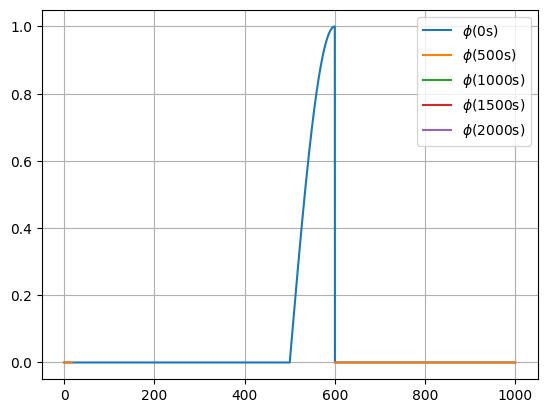

In [23]:
u = -0.42 # intial condition
advection(x0, y0) # run